<a href="https://colab.research.google.com/github/rohanpanchal466/Bio/blob/master/MINI_PROJECT(MACHINE_LEARNING)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [118]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-09')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993


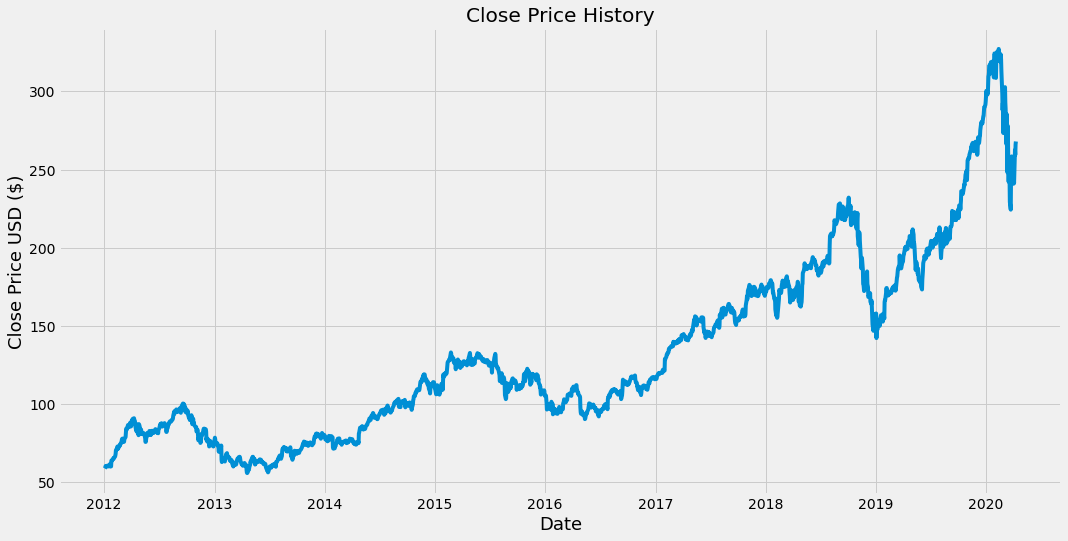

In [119]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [120]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1665

In [121]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.75030391],
       [0.77476879],
       [0.7818429 ]])

In [122]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [124]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1605, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [216]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1605/1605 [==============================] - 44s 27ms/step - loss: 1.0119e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [221]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.574445961520803

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


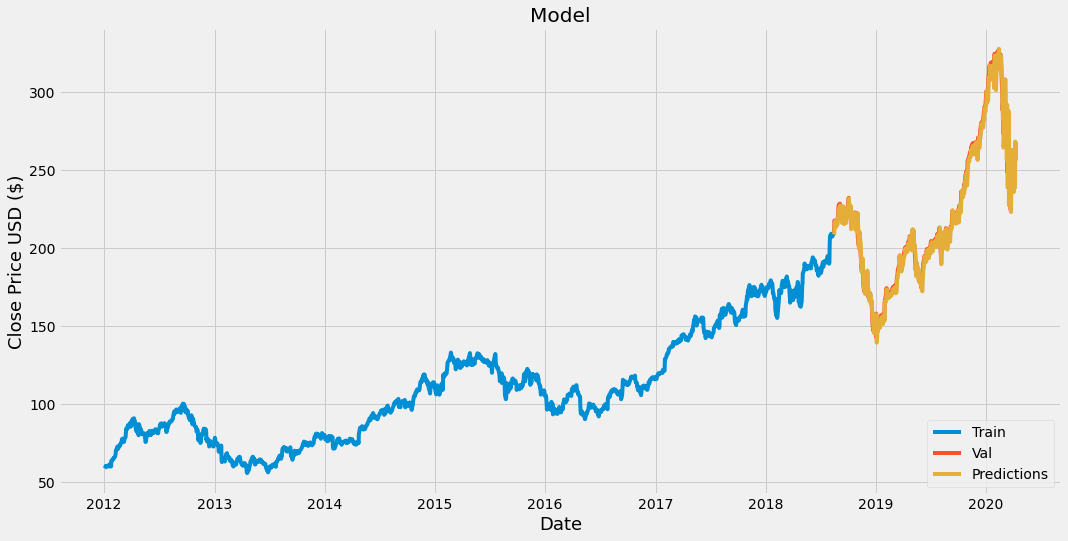

In [222]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [224]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-15,210.240005,208.467316
2018-08-16,213.320007,208.951859
2018-08-17,217.580002,212.732498
2018-08-20,215.460007,217.298981
2018-08-21,215.039993,213.539474
...,...,...
2020-04-03,241.410004,245.325623
2020-04-06,262.470001,238.536270
2020-04-07,259.429993,268.103546


In [225]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-09')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[266.79202]]


In [226]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-04-09', end='2020-04-09')
print(apple_quote2['Close'])

Date
2020-04-09    267.98999
Name: Close, dtype: float64


In [231]:
pip install newspaper3k

     |████████████████████████████████| 215kB 2.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 194kB 41.1MB/s 
     |████████████████████████████████| 7.4MB 16.4MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=ff98031eff35f89d80bc4901bf2c9acdf1408e713b9c23ac2ecbe58cec8d85a3
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13539 sha256=1e22611496abf417aee9248471c4506005f054485b5df9afde1109b93d5e65f7
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=6b9e059331dd28fe866ff10634ee2a4bfa90f214ffdc17586303785c69a3a9ea
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef71

In [0]:
#importing libraries
from textblob import TextBlob
import nltk
from newspaper import Article

In [0]:
url='https://www.barrons.com/articles/apple-stock-appletv-iphone-11-analyst-expects-more-gains-51570634831'
article=Article(url)

In [234]:
#Natural language processing
article.download()
article.parse()
nltk.download('punkt')
article.nlp()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [235]:
#Get the summary of the article
text=article.summary
print(text)

Text sizeApple stock has had a great year, and Canaccord sees more potential gains, thanks to the success of the iPhone 11 and growth in the services business.
The launch of Apple TV+ in November could give the stock an extra push.
Apple stock (ticker: AAPL) has rallied more than 43% in 2019, more than double the gains seen by the S&P 500, and ahead of the 29% rise of the Technology Select Sector SDPR ETF (XLK).
It is the best-performing FAANG stock this year, beating Facebook (FB), Amazon.com (AMZN), Netflix (NFLX), and Alphabet (GOOGL), Google’s parent.
The launch of Apple TV+ next month could give the services business another push, he said.


In [236]:
#create a text blob object
obj=TextBlob(text)
sentiment=obj.sentiment.polarity
print(sentiment)

0.27999999999999997


In [237]:
if sentiment==0:
  print('Investing can be done')
elif sentiment>0:
  print('Investing will give profit in future')
else:
  print('Chances of profit are low in percent')

Investing will give profit in future
